In [3]:
!unzip capstone_bottle.zip

Archive:  capstone_bottle.zip
   creating: capstone_bottle/test/
   creating: capstone_bottle/test/bottle/
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170116_png.rf.a3a34dc54f1de10ad7d13f324d60fe43.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170143_png.rf.d1172796196c7b8071f740453de54874.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170201_png.rf.2cbf5075874d45cfe01c0168ebb69318.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170221_png.rf.4be9464ee6d0ff87c20177624636ec32.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170237_png.rf.30c09043ebe6332f270fbc941448c5d1.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170310_png.rf.b9374c3c013f48b344400beeff983b07.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170333_png.rf.f1966b12b3f1c86da273e1f344547f8d.jpg  
  inflating: capstone_bottle/test/bottle/Screenshot-2023-12-28-170349_png.rf.ac22

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_shape = (224, 224, 3)

base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)  \

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/capstone_bottle/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/capstone_bottle/validation/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.fit(train_generator, validation_data=val_generator)

test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bottle/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(test_generator)

87910968/87910968 [==============================] - 1s 0us/step
Found 112 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
4/4 [==============================] - 27s 5s/step - loss: 0.4239 - accuracy: 0.7411 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Found 36 images belonging to 1 classes.
2/2 [==============================] - 4s 440ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

Found 36 images belonging to 1 classes.
1/1 [==============================] - 0s 157ms/step


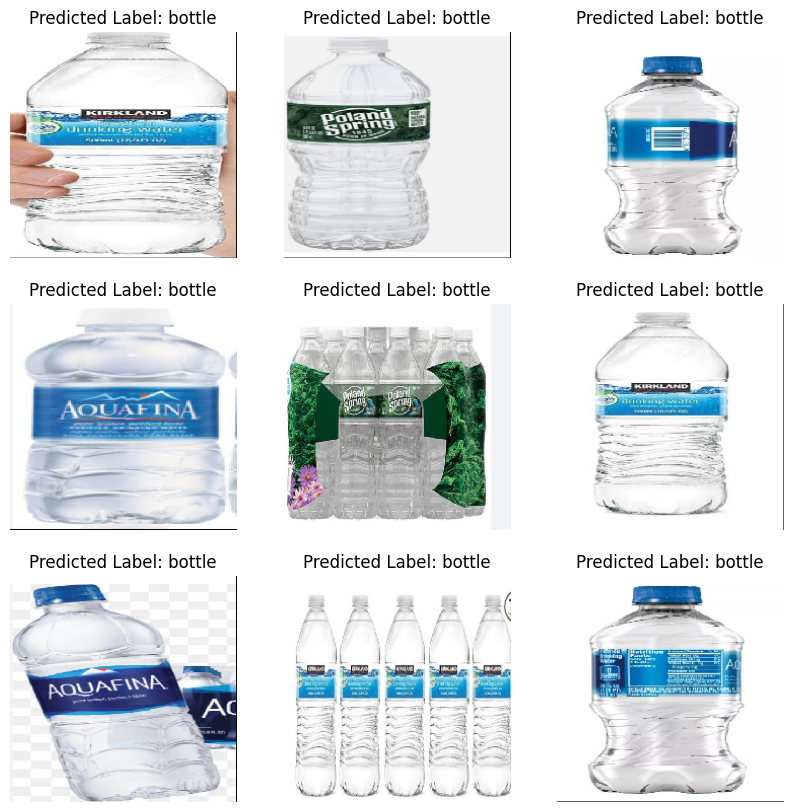

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bottle/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

images, labels = next(test_generator)


class_labels = {0: 'bottle'}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    img = images[i] * 255

    plt.imshow(img.astype('uint8'))

    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    plt.title("Predicted Label: {}".format(class_labels[int(labels[i])], class_labels[predicted_label]))
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 170ms/step


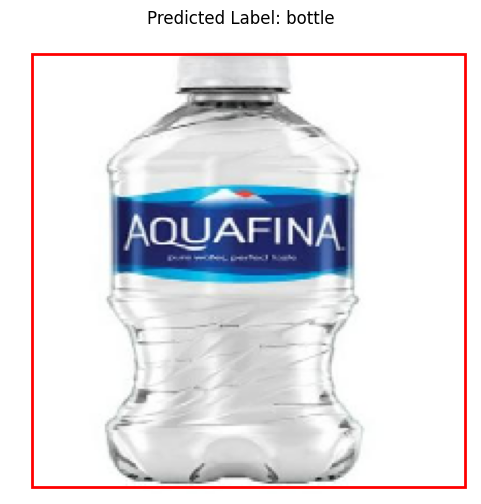

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

img_path = '/content/Screenshot-2023-12-28-171253_png.rf.d90824b86330030ad5b339a86e96b049.jpg'
img = image.load_img(img_path, target_size=(224, 224))

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

prediction = model.predict(x)
predicted_label = np.argmax(prediction)

class_labels = {0: 'bottle'}

bbox = (10, 10, 220, 220)
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

plt.title("Predicted Label: {}".format(class_labels[predicted_label]))
plt.show()


In [21]:
!unzip capstone_bar_bottle.zip

Archive:  capstone_bar_bottle.zip
   creating: capstone_bar_bottle/test/
   creating: capstone_bar_bottle/test/bar/
  inflating: capstone_bar_bottle/test/bar/0004749521000-1-_jpg.rf.ec2fc0aaec187ba2e64ee195d9271a84.jpg  
  inflating: capstone_bar_bottle/test/bar/154527ee-944b-43c6-98c5-a3c877c973c5_jpg.rf.a64f79f681ebe54b92b099f3d1563aa7.jpg  
  inflating: capstone_bar_bottle/test/bar/2277232_Qiktogetufit_57eda9ec-328d-4a29-b36d-a38031b6e48f_jpg.rf.3d24ec31e822cef1776b5a7c90b29d6e.jpg  
  inflating: capstone_bar_bottle/test/bar/30698509-11_jpg.rf.42d4dde79a07a58847e45066da092136.jpg  
  inflating: capstone_bar_bottle/test/bar/7144UD-cWWL_jpg.rf.484187872c61021a3562acac0cb23037.jpg  
  inflating: capstone_bar_bottle/test/bar/7144UD-cWWL_jpg.rf.580011a75937eefe2aa4651bfd39a221.jpg  
  inflating: capstone_bar_bottle/test/bar/7144UD-cWWL_jpg.rf.f3fb693bacb6c7701645583e22d9c603.jpg  
  inflating: capstone_bar_bottle/test/bar/71ifsaWdsnL_jpg.rf.47821cb8efeb88fb6a9260f7953858ae.jpg  
  inflat

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_shape = (224, 224, 3)

base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)  \

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/validation/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.fit(train_generator, validation_data=val_generator)

test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(test_generator)

Found 219 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
7/7 [==============================] - 46s 6s/step - loss: 0.3983 - accuracy: 0.8630 - val_loss: 6.0430e-06 - val_accuracy: 1.0000
Found 84 images belonging to 2 classes.
3/3 [==============================] - 10s 3s/step - loss: 0.0155 - accuracy: 0.9881


[0.01551743596792221, 0.988095223903656]

Found 84 images belonging to 2 classes.
1/1 [==============================] - 0s 159ms/step


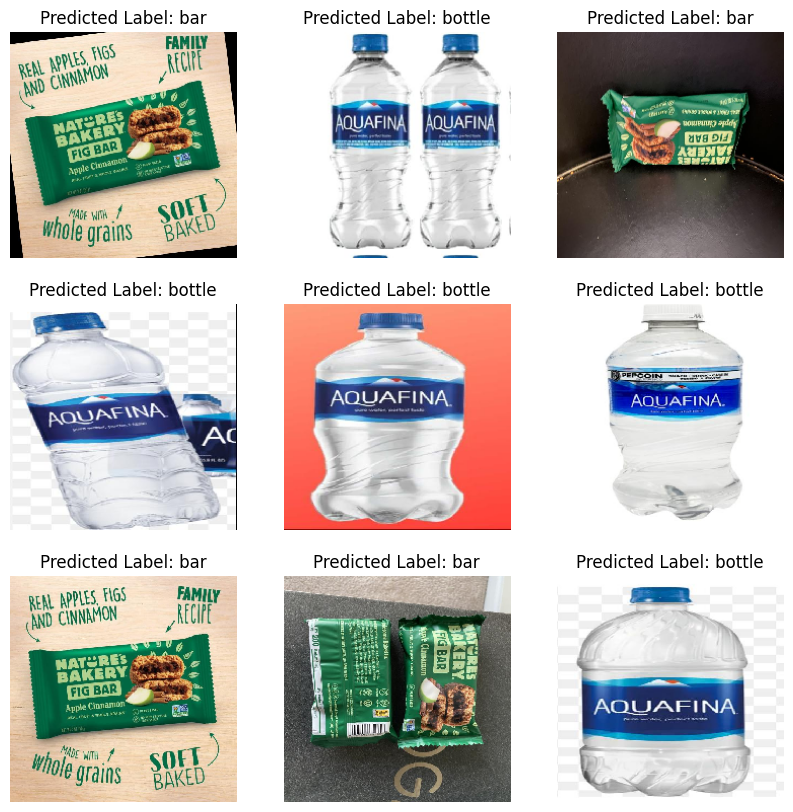

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_generator = val_datagen.flow_from_directory(
    '/content/capstone_bar_bottle/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

images, labels = next(test_generator)

class_labels = {0: 'bar', 1: 'bottle'}


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    img = images[i] * 255

    plt.imshow(img.astype('uint8'))


    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    plt.title("Predicted Label: {}".format(class_labels[int(labels[i])], class_labels[predicted_label]))
    plt.axis('off')
plt.show()


3/3 [==============================] - 10s 3s/step - loss: 0.0155 - accuracy: 0.9881
Evaluation Results: [0.015517435036599636, 0.988095223903656]


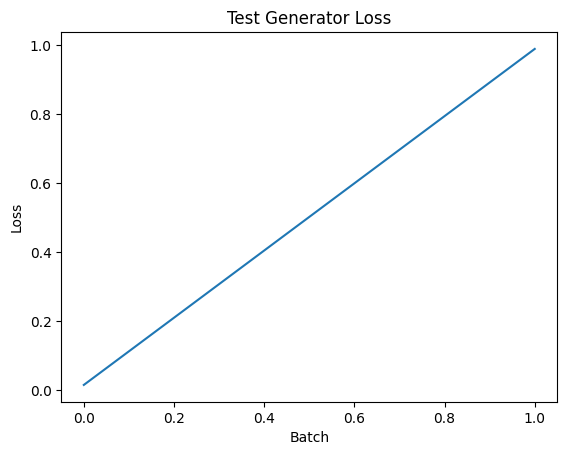

In [28]:
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss = model.evaluate(test_generator)

# Print out the evaluation results
print("Evaluation Results:", loss)

# Verify that the loss value is not empty
if loss is None:
    print("Test loss value is empty.")
else:
    # Plot the loss value
    plt.plot(loss)
    plt.title('Test Generator Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()
